In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [2]:
a=pd.read_csv(r'C:\Users\HP\Desktop\Python\Assignment\Decision Trees\Company_Data.csv')

In [3]:
a

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
a.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
a.shape

(400, 11)

In [8]:
a.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

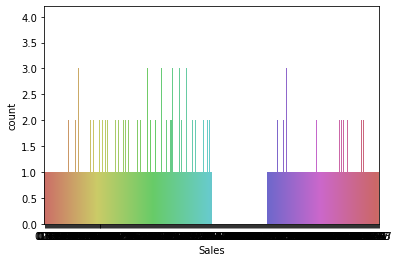

<Figure size 432x288 with 0 Axes>

In [10]:
import seaborn as sns
sns.countplot(x='Sales',data=a,palette='hls')
plt.show()
plt.savefig('count_plot')

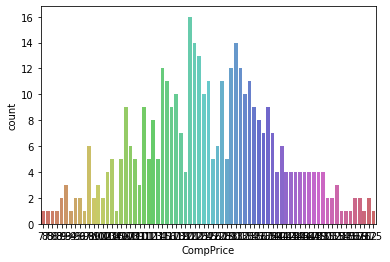

<Figure size 432x288 with 0 Axes>

In [43]:
sns.countplot(x='CompPrice',data=a,palette='hls')
plt.show()
plt.savefig('count_plot')

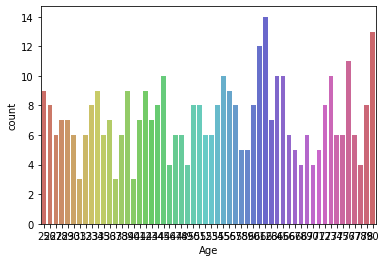

<Figure size 432x288 with 0 Axes>

In [20]:
sns.countplot(x='Age',data=a,palette='hls')
plt.show()
plt.savefig('count_plot')

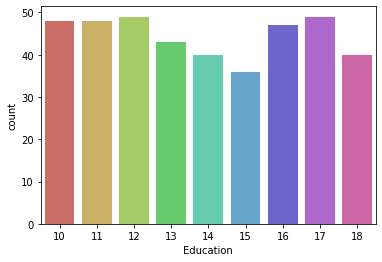

<Figure size 432x288 with 0 Axes>

In [21]:
sns.countplot(x='Education',data=a,palette='hls')
plt.show()
plt.savefig('count_plot')

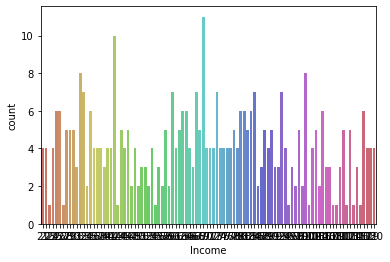

<Figure size 432x288 with 0 Axes>

In [22]:
sns.countplot(x='Income',data=a,palette='hls')
plt.show()
plt.savefig('count_plot')

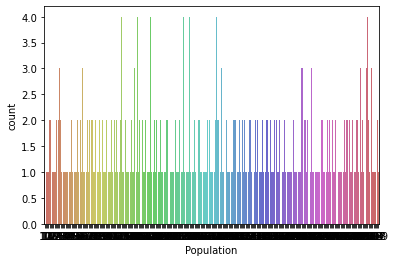

<Figure size 432x288 with 0 Axes>

In [23]:
sns.countplot(x='Population',data=a,palette='hls')
plt.show()
plt.savefig('count_plot')

In [12]:
a.groupby('Sales').mean()

,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,,,,,,,
0.00,139.0,24.0,0.0,358.0,185.0,79.0,15.0
0.16,102.0,33.0,0.0,217.0,139.0,70.0,18.0
0.37,147.0,58.0,7.0,100.0,191.0,27.0,15.0
0.53,122.0,88.0,7.0,36.0,159.0,28.0,17.0
0.91,93.0,91.0,0.0,22.0,117.0,75.0,11.0
...,...,...,...,...,...,...,...
13.91,110.0,110.0,0.0,408.0,68.0,46.0,17.0
14.37,95.0,106.0,0.0,256.0,53.0,52.0,17.0
14.90,139.0,32.0,0.0,176.0,82.0,54.0,11.0


In [13]:
a.groupby('CompPrice').mean()

,Sales,Income,Advertising,Population,Price,Age,Education
CompPrice,,,,,,,
77,10.430,69.0,0.0,25.0,24.0,50.0,18.0
85,4.160,79.0,6.0,325.0,95.0,69.0,13.0
86,7.780,54.0,0.0,497.0,64.0,33.0,12.0
88,8.550,111.0,23.0,480.0,92.0,36.0,16.0
89,9.400,79.5,7.5,209.0,74.0,58.5,13.5
...,...,...,...,...,...,...,...
157,9.285,73.0,0.0,227.0,136.5,45.0,16.5
159,7.660,74.5,0.0,400.0,143.5,36.0,17.5
161,7.450,82.0,5.0,287.0,129.0,33.0,16.0


In [14]:
a.groupby('Income').mean()

,Sales,CompPrice,Advertising,Population,Price,Age,Education
Income,,,,,,,
21,5.710000,123.500000,10.00,278.75,138.00,50.500000,12.750000
22,6.755000,112.500000,2.75,303.25,102.75,57.750000,13.250000
23,6.140000,139.000000,3.00,37.00,120.00,55.000000,11.000000
24,4.742500,124.000000,1.25,252.50,135.25,63.500000,12.750000
25,6.461667,125.166667,6.00,173.50,113.50,54.666667,14.666667
...,...,...,...,...,...,...,...
116,5.320000,152.000000,0.00,170.00,160.00,39.000000,16.000000
117,9.121667,113.666667,8.50,326.50,101.50,42.833333,12.666667
118,7.202500,116.000000,9.25,291.25,122.75,51.500000,16.000000


In [15]:
a.groupby('Advertising').mean()

,Sales,CompPrice,Income,Population,Price,Age,Education
Advertising,,,,,,,
0,6.824514,124.868056,67.340278,231.395833,113.569444,53.631944,14.180556
1,6.837500,124.625000,55.250000,176.250000,123.125000,43.375000,12.250000
2,6.568889,125.000000,78.333333,263.222222,121.333333,51.777778,14.555556
3,7.362857,128.142857,65.357143,219.142857,107.571429,57.500000,14.571429
4,6.992500,124.666667,68.333333,288.250000,118.000000,51.500000,13.500000
5,6.838947,132.000000,72.789474,275.315789,125.736842,54.526316,13.000000
6,5.584286,121.571429,58.142857,332.857143,124.428571,50.142857,15.428571
7,7.078125,128.687500,64.687500,233.500000,123.625000,46.375000,13.000000
8,8.092727,125.545455,69.363636,267.636364,112.909091,51.454545,12.363636


In [16]:
a.groupby('Population').mean()

,Sales,CompPrice,Income,Advertising,Price,Age,Education
Population,,,,,,,
10,5.170,131.0,75.0,0.0,120.0,31.0,18.0
12,5.360,111.0,52.0,0.0,101.0,61.0,11.0
13,5.900,138.0,92.0,0.0,120.0,61.0,12.0
14,12.980,113.0,33.0,0.0,63.0,38.0,12.0
16,8.280,125.0,66.0,12.5,102.0,53.5,14.0
...,...,...,...,...,...,...,...
503,11.960,117.0,94.0,4.0,94.0,50.0,13.0
504,4.550,111.0,56.0,0.0,110.0,62.0,16.0
507,8.800,145.0,53.0,0.0,119.0,41.0,12.0


In [17]:
a.groupby('Price').mean()

,Sales,CompPrice,Income,Advertising,Population,Age,Education
Price,,,,,,,
24,10.43,77.0,69.0,0.0,25.0,50.0,18.0
49,9.34,89.0,78.0,0.0,181.0,43.0,15.0
53,14.37,95.0,106.0,0.0,256.0,52.0,17.0
54,9.33,103.0,81.0,3.0,491.0,66.0,13.0
55,12.49,93.0,106.0,12.0,416.0,75.0,15.0
...,...,...,...,...,...,...,...
166,7.27,167.0,67.0,14.5,428.5,49.5,14.5
171,6.39,131.0,21.0,8.0,220.0,29.0,14.0
173,6.67,156.0,42.0,13.0,170.0,74.0,14.0


In [18]:
a.groupby('Age').mean()

,Sales,CompPrice,Income,Advertising,Population,Price,Education
Age,,,,,,,
25,7.130000,124.111111,60.555556,4.888889,264.000000,123.222222,14.222222
26,8.863750,127.250000,59.750000,6.250000,350.750000,113.125000,13.625000
27,7.538333,126.500000,67.666667,1.166667,165.666667,122.000000,14.666667
28,7.721429,130.285714,56.571429,6.142857,256.714286,129.000000,14.428571
29,7.525714,121.571429,77.285714,8.142857,289.000000,134.142857,12.857143
30,10.305000,125.333333,68.000000,8.500000,317.500000,104.666667,14.000000
31,8.243333,125.666667,64.666667,5.000000,129.333333,127.666667,14.666667
32,8.533333,127.333333,82.833333,6.833333,244.000000,122.666667,14.666667
33,8.048750,130.250000,68.875000,10.375000,305.750000,122.875000,13.250000


In [19]:
a.groupby('Education').mean()

,Sales,CompPrice,Income,Advertising,Population,Price,Age
Education,,,,,,,
10,8.245833,126.916667,73.541667,7.437500,291.791667,116.000000,54.166667
11,7.471250,123.083333,71.520833,6.854167,249.854167,111.312500,55.083333
12,7.467755,123.306122,67.591837,6.244898,265.061224,114.714286,50.959184
13,7.052326,126.232558,69.976744,6.325581,286.767442,121.186047,51.976744
14,7.075250,123.625000,61.450000,7.475000,305.700000,120.250000,49.600000
15,8.131667,122.944444,67.944444,5.777778,289.305556,112.333333,56.361111
16,7.244468,125.404255,69.574468,6.553191,258.936170,114.957447,55.957447
17,7.502857,127.040816,68.653061,6.612245,217.367347,116.510204,52.877551
18,7.276500,125.750000,66.025000,6.275000,228.850000,115.225000,52.975000


In [24]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['ShelveLoc','Urban', 'US'])
sales1=encoder.fit_transform(a)

In [25]:
sales_val = []
for value in a["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
sales1["sales_val"]= sales_val

In [26]:
sales1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1,high
396,6.14,139,23,3,37,120,3,55,11,2,1,low
397,7.41,162,26,12,368,159,3,40,18,1,1,low
398,5.94,100,79,7,284,95,1,50,12,1,1,low


In [27]:
x=sales1.drop(['sales_val','Sales'],axis=1)
y=sales1['sales_val']

In [28]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [29]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sales_val, Length: 400, dtype: object

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

#### Building decision tree classifier using entropy criteria

In [31]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [32]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

low     65
high    55
dtype: int64

In [33]:
preds

array(['low', 'low', 'low', 'high', 'low', 'high', 'high', 'high', 'high',
       'high', 'low', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'high', 'high', 'high', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'high', 'low',
       'high', 'low', 'low', 'high', 'high', 'low', 'low', 'low', 'high',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'high', 'low', 'low', 'low', 'high', 'high', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'low', 'high',
       'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low', 'high',
       'low', 'high', 'low', 'low', 'high', 'high', 'high', 'high', 'low',
       'low', 'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low',
       'high', 'low', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'low', 'high', 'high', 'high'], dtype=

In [34]:
pd.crosstab(y_test,preds)

col_0,high,low
sales_val,,
high,34,18
low,21,47


In [35]:
#accuracy
np.mean(preds==y_test)

0.675

In [36]:

(34+47)/(34+18+21+47)

0.675

In [37]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        high       0.65      0.62      0.64        55
         low       0.69      0.72      0.71        65

    accuracy                           0.68       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.67      0.68      0.67       120



Text(0.5, 1.0, 'Decision tree using Entropy')

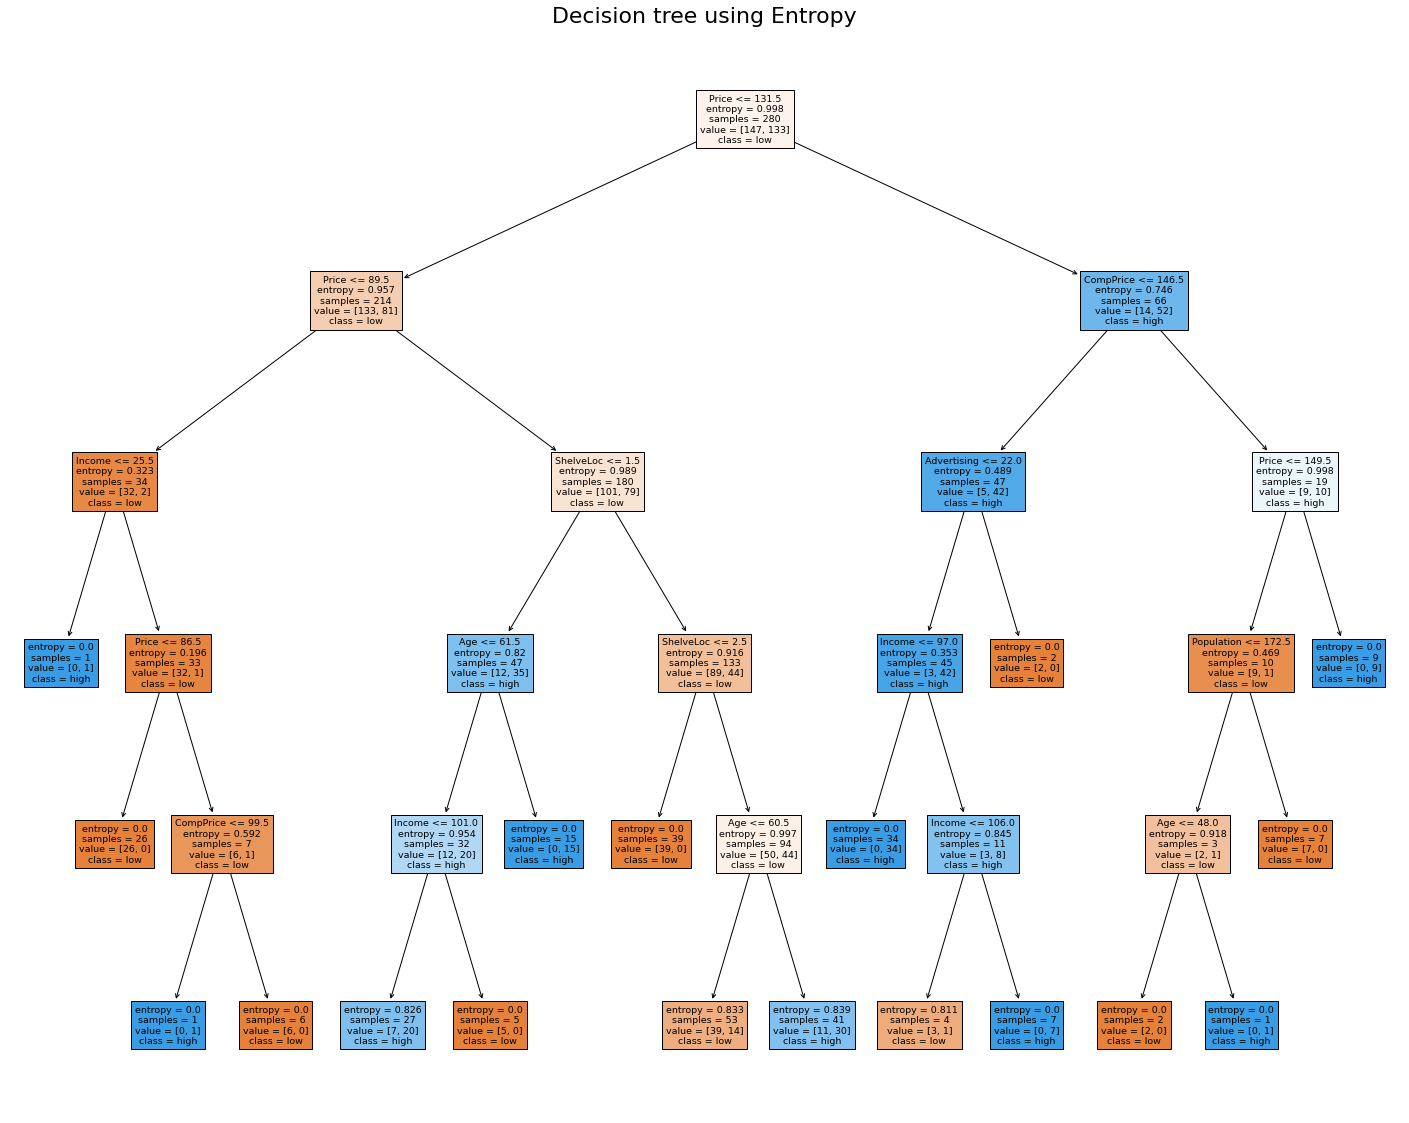

In [38]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

#### Building Decision Tree Classifier (CART) using Gini Criteria

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [40]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [41]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.675

Text(0.5, 1.0, 'Decision tree using Entropy')

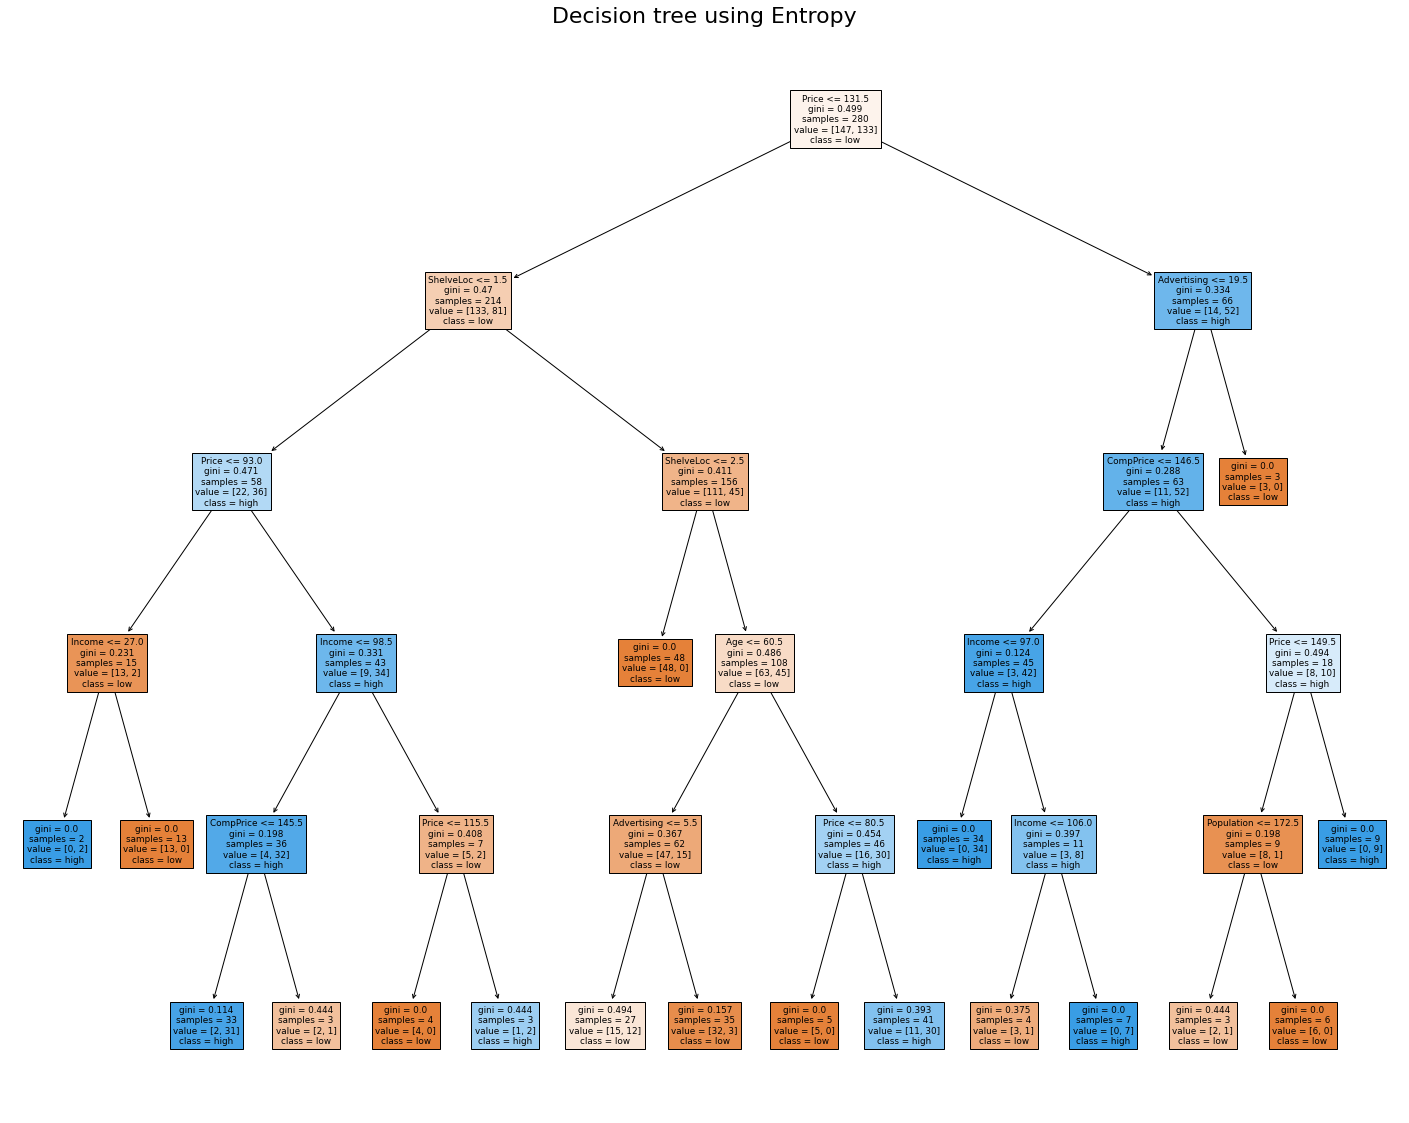

In [42]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

##### Hence from the both of the tree's we can understand that the most important constraints of the given data are price ,advertising and comp price.